<a href="https://colab.research.google.com/github/aleksanderprofic/Machine-Learning/blob/master/Classification/social_network_ads_data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social network ads Data Visualisation

### Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Correlations visualisation

#### Correlation between Age and Purchased

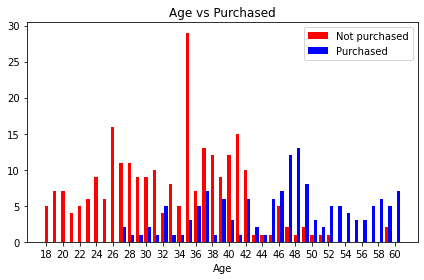

In [2]:
grouped_df = df.groupby(by='Age')

zeros = []
ones = []
ages = []
for age, group in grouped_df:
    zeros.append(sum(1 for number in group['Purchased'] if number == 0))
    ones.append(sum(1 for number in group['Purchased'] if number == 1))
    ages.append(age)


plt.bar(ages, zeros, color='r', width=0.4, label='Not purchased')
plt.bar([age + 0.4 for age in ages], ones, color='b', width=0.4, label='Purchased')

plt.title('Age vs Purchased')
plt.xlabel('Age')
plt.xticks(np.arange(min(df['Age']), max(df['Age']) + 1, 2))
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
df['Age'].corr(df['Purchased'])

0.622454198884529

Pretty strong positive correlation between Age and Purchased

#### Correlation between EstimatedSalary and Purchased

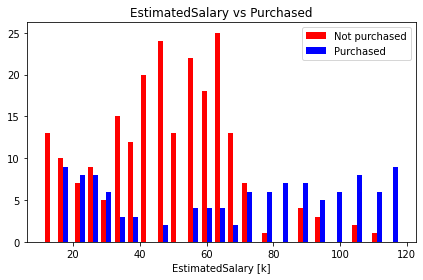

In [4]:
grouped_df = df.groupby(by='EstimatedSalary')
zeros = []
ones = []
salaries = []

i = 0
temp_zeros = 0
temp_ones = 0
temp_salary = 0
for salary, group in grouped_df:
    if i < 4:
        temp_zeros += sum(1 for number in group['Purchased'] if number == 0)
        temp_ones += sum(1 for number in group['Purchased'] if number == 1)
        temp_salary += salary // 1000
        i += 1
    else:
        zeros.append(temp_zeros)
        ones.append(temp_ones)
        salaries.append(temp_salary // 5)
        i = 0
        temp_zeros = 0
        temp_ones = 0 
        temp_salary = 0


plt.bar([salary + -1.5 for salary in salaries], zeros, color='r', width=1.5, label='Not purchased', align='edge')
plt.bar([salary for salary in salaries], ones, color='b', width=1.5, label='Purchased', align='edge')

plt.title('EstimatedSalary vs Purchased')
plt.xlabel('EstimatedSalary [k]')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
df['EstimatedSalary'].corr(df['Purchased'])

0.36208302580467927

Weak positive correlation between EstimatedSalary and Purchased